In [ ]:
!pip install gdown

In [ ]:
import gdown
import pandas as pd

In [ ]:
credits_id = '1OgAdH8h-8gBTh3IvZAKkfilgJ7NP_PYJ'
gdown.download(f'https://drive.google.com/uc?id={credits_id}', 'credits.csv')
credits = pd.read_csv('credits.csv')

keywords_id = '1pwuGPB-f8sX0HBZm4lXIjwVNxpgBM6EE'
gdown.download(f'https://drive.google.com/uc?id={keywords_id}', 'keywords.csv')
keywords = pd.read_csv('keywords.csv')

links_small_id = '1CeVsfXl2MHqunJXJsPhGKg9EqT5rWNhq'
gdown.download(f'https://drive.google.com/uc?id={links_small_id}', 'links_small.csv')
links_small = pd.read_csv('links_small.csv')

movies_metadata_id = '1fiKyla5QlCGq1ERb5IT7GlDVxehkLK0P'
gdown.download(f'https://drive.google.com/uc?id={movies_metadata_id}', 'movies_metadata.csv')
metadata = pd.read_csv('movies_metadata.csv')

ratings_small_id = '1rVEKuncfTQUeS8eTzT_TxThskkCqeppV'
gdown.download(f'https://drive.google.com/uc?id={ratings_small_id}', 'ratings_small.csv')
ratings_small = pd.read_csv('ratings_small.csv')

Downloading...
From: https://drive.google.com/uc?id=1OgAdH8h-8gBTh3IvZAKkfilgJ7NP_PYJ
To: /content/credits.csv
100%|██████████| 190M/190M [00:00<00:00, 225MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pwuGPB-f8sX0HBZm4lXIjwVNxpgBM6EE
To: /content/keywords.csv
100%|██████████| 6.23M/6.23M [00:00<00:00, 46.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CeVsfXl2MHqunJXJsPhGKg9EqT5rWNhq
To: /content/links_small.csv
100%|██████████| 183k/183k [00:00<00:00, 80.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fiKyla5QlCGq1ERb5IT7GlDVxehkLK0P
To: /content/movies_metadata.csv
100%|██████████| 34.4M/34.4M [00:00<00:00, 197MB/s]
<ipython-input-9-abd0b2a9971a>:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')
Downloading...
From: https://drive.google.com/uc?id=1rVEKuncfTQUeS8eTzT_TxThskkCqeppV
To: /content/ratings_small.csv
100%|██████████| 2.44M/2.44M [00:00<

### Demographic Recommender



In this model we sort our movies based on ratings, and display the top movies of our list. It is also a good way to recommend movies for users who don't have any past watch history as the recommendations are based ont he relevance of the movie and how well it is doing ont he platform in terms of ratings.

In [ ]:
metadata['vote_average'].mean()

5.618207215134185

The mean rating for all the movies is approximately 5.6 on a scale of 10.

The next step is to determine an appropriate value for m, the minimum number of votes required for a movie to be listed in the top movies chart. We are using 90th percentile as our cutoff.

In [ ]:
metadata['vote_count'].quantile(q=0.90)

160.0

In other words, for a movie to feature in the charts, the number of its votes should be higher than that of 90% of the movies in the list which in this case is 160 votes.

In [ ]:
df_filtered=metadata[metadata['vote_count']>metadata['vote_count'].quantile(q=0.9)]
df_filtered.shape

(4538, 24)

We see that there are 4538 movies which qualify to be in this list. Now, we calculate the weighted score for each qualified movie. To do this, we define a function, weighted_rating(), and apply this function to the qualified movies.

The formula we use is-
Weighted Rating (WR) =  ((𝑣/𝑣+𝑚)*𝑅)+((𝑚/𝑣+𝑚)*𝐶)

where,
v: the number of votes for the movie

m: the minimum votes required to be listed in the chart

R: the average rating of the movie

C: the mean vote across the whole report

In [ ]:
def movie_score(x):
    v=x['vote_count']
    m=metadata['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=metadata['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

df_filtered['score']=df_filtered.apply(movie_score, axis=1)

<ipython-input-16-fecef6f67bca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['score']=df_filtered.apply(movie_score, axis=1)


We sort the dataframe based on the score feature. Then we output the title, genres, vote count, vote average, popularity and score of the top 10 movies.

In [ ]:
df_highscore=df_filtered.sort_values(by='score', ascending=False).head(10)
df_highscore[['title', 'vote_count', 'vote_average', 'popularity', 'score']]

,title,vote_count,vote_average,popularity,score
314,The Shawshank Redemption,8358.0,8.5,51.645403,8.445869
834,The Godfather,6024.0,8.5,41.109264,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,34.457024,8.421453
12481,The Dark Knight,12269.0,8.3,123.167259,8.265477
2843,Fight Club,9678.0,8.3,63.869599,8.256385
292,Pulp Fiction,8670.0,8.3,140.950236,8.251406
522,Schindler's List,4436.0,8.3,41.725123,8.206639
23673,Whiplash,4376.0,8.3,64.29999,8.205404
5481,Spirited Away,3968.0,8.3,41.048867,8.196055
2211,Life Is Beautiful,3643.0,8.3,39.39497,8.187171


Here, we generate a graph for the most popular movies out of the top 10 highest scored movies.
This demographic based recommender generates a recommendation when we don't have any past data and want to generate movies based on relevance.

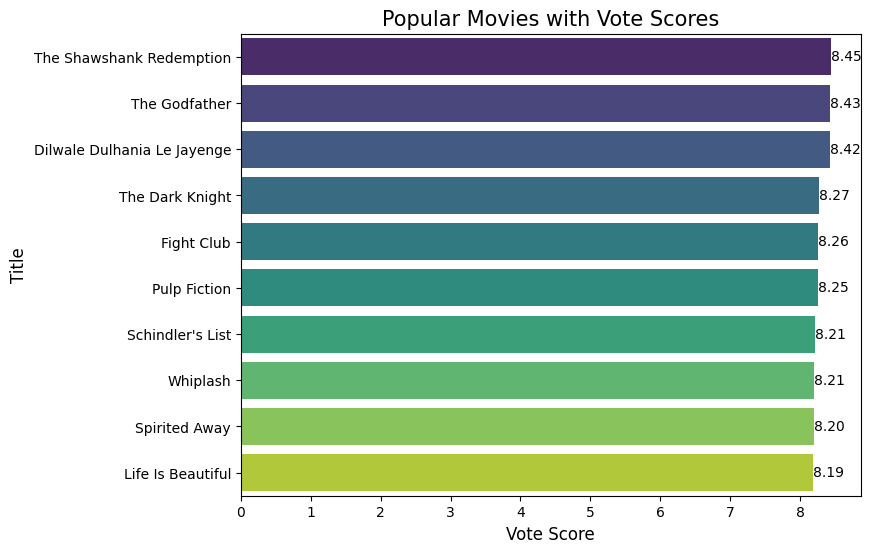

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(y='title', x='score', data=df_highscore, palette='viridis')

# Add text labels on top of the bars
for index, value in enumerate(df_highscore['score']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.xlabel("Vote Score", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies with Vote Scores", fontsize=15)
plt.show()
